# Testing Models

## (4) Decision Tree

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset - new data set after feature extraction
train = pd.read_csv("new_feauturesExtracted_dataset.csv")

train.head(10)


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,neg,neu,pos,compound,Helpfulness,UnHelpfulness,UserAvgScore,NumUppercase_T,NumUppercase_S,ReviewLength,SummaryLength,Month,Year,numExclamation_S,numExclamation_T
0,1561604,1,4,2.0,1388793600,0.153,0.692,0.155,-0.4040,0.250000,0.250000,2.000000,9,2.0,97.0,3.0,1.0,2014.0,1.0,0.0
1,516128,5,7,5.0,1033171200,0.000,0.727,0.273,0.9231,0.714286,0.714286,3.083333,6,5.0,43.0,5.0,9.0,2002.0,1.0,0.0
2,1265775,0,0,4.0,1390521600,0.000,0.767,0.233,0.7901,0.000000,0.000000,4.000000,0,0.0,25.0,1.0,1.0,2014.0,0.0,1.0
3,484323,3,4,4.0,1136332800,0.030,0.771,0.199,0.9829,0.750000,0.750000,4.500000,14,1.0,126.0,3.0,1.0,2006.0,1.0,3.0
4,158350,1,2,5.0,1372204800,0.000,0.880,0.120,0.4588,0.500000,0.500000,4.600000,0,1.0,23.0,2.0,6.0,2013.0,0.0,0.0
5,192763,5,8,5.0,1138579200,0.035,0.833,0.132,0.9938,0.625000,0.625000,4.500000,188,27.0,440.0,17.0,1.0,2006.0,0.0,4.0
6,1060454,0,0,4.0,1403654400,0.111,0.737,0.152,0.4118,0.000000,0.000000,3.500000,9,2.0,54.0,4.0,6.0,2014.0,0.0,0.0
7,860129,0,6,3.0,1162080000,0.151,0.754,0.095,-0.6306,0.000000,0.000000,4.000000,13,3.0,46.0,3.0,10.0,2006.0,0.0,0.0
8,1470316,2,5,1.0,1357776000,0.030,0.813,0.157,0.7884,0.400000,0.400000,1.000000,3,1.0,41.0,1.0,1.0,2013.0,0.0,0.0
9,725990,0,0,5.0,1396828800,0.022,0.800,0.178,0.9504,0.000000,0.000000,5.000000,22,1.0,87.0,5.0,4.0,2014.0,0.0,0.0


In [ ]:
# we have to split this data into train and test
# We create a new column called `train` which is `True` if the instance should be included in the training by using the numpy random number generator.

train['train'] = np.random.rand(len(train)) < 0.8

df_train = train[train.train == True]
df_test = train[train.train == False]

print(df_train.shape, df_test.shape)

(71876, 21) (17885, 21)


In [ ]:
train.columns

Index(['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'neg', 'neu', 'pos', 'compound', 'Helpfulness', 'UnHelpfulness',
       'UserAvgScore', 'NumUppercase_T', 'NumUppercase_S', 'ReviewLength',
       'SummaryLength', 'Month', 'Year', 'numExclamation_S',
       'numExclamation_T', 'train'],
      dtype='object')

In [ ]:
predictors = ['compound', 'Helpfulness', 'NumUppercase_T', 'ReviewLength','Month', 'numExclamation_T']
X1_train = df_train[predictors]
X1_test = df_test[predictors]
y_train = df_train['Score']
y_test = df_test['Score']
X1_train.head()

,compound,Helpfulness,NumUppercase_T,ReviewLength,Month,numExclamation_T
1,0.9231,0.714286,6,43.0,9.0,0.0
2,0.7901,0.000000,0,25.0,1.0,1.0
3,0.9829,0.750000,14,126.0,1.0,3.0
4,0.4588,0.500000,0,23.0,6.0,0.0
5,0.9938,0.625000,188,440.0,1.0,4.0


In [1]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X1_train[predictors], y_train)

# Evaluating MSE on train
from sklearn.metrics import mean_squared_error
y_hat_train = dt.predict(X1_train[predictors])
print("MSE on train: ")
mse_train = mean_squared_error(y_train, y_hat_train)
mse_train


NameError: ignored

In [ ]:
# Evaluating MSE on test set
y_hat_test = dt.predict(X1_test[predictors])
print("MSE on test: ")
mse_test = mean_squared_error(y_hat_test, y_test)
mse_test

MSE on test: 


2.0610610651620314

In [ ]:
dt.feature_importances_

array([0.35858407, 0.15827122, 0.14145496, 0.20164272, 0.10444425,
       0.03560278])

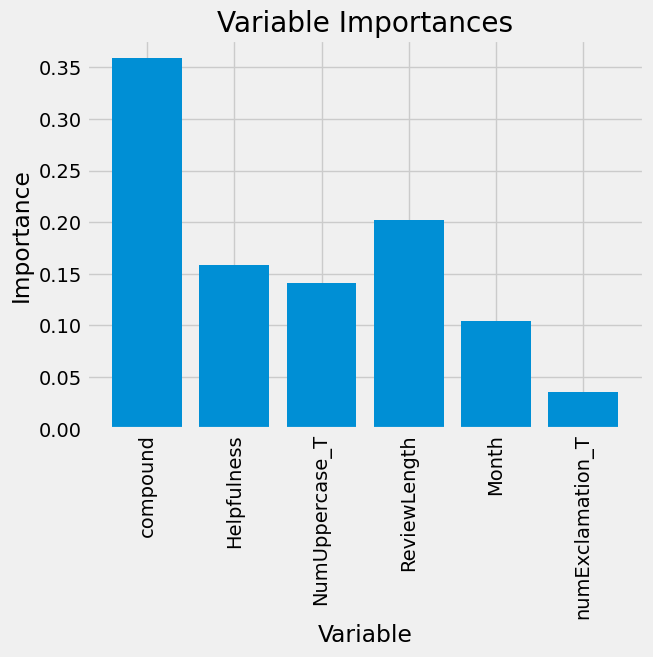

In [ ]:
plt.style.use('fivethirtyeight')

importances = list(dt.feature_importances_)
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, predictors, rotation='vertical') # Tick labels for x axis
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

## Cost Complexity Pruning 

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))

# trying different alpha values 
alphas = [0.0001, 0.00005, 0.00001, 0.000001, 0.00000001, 0]

ctr=1
for a in alphas:
    dt = DecisionTreeRegressor(ccp_alpha=a)
    dt.fit(X1_train[predictors], y_train)
    plt.subplot(1, len(alphas), ctr)
    ctr += 1
    plot_tree(dt, feature_names=predictors)
    plt.title(f'ccp_alpha={a}')
plt.show()

In [ ]:
# Cost complexity pruning
path = dt.cost_complexity_pruning_path(X1_train[predictors], y_train)
alphas = [0.0001, 0.00005,  0.00001,  0.000001, 0.00000001, 0]

# Fit decision tree models using each alpha value
dt_models = []
for a in alphas:
    dt = DecisionTreeRegressor(ccp_alpha=a)
    dt.fit(X1_train[predictors], y_train)
    dt_models.append(dt)

# Calculate the training and testing MSEs for each model
train_mses = []
test_mses = []
for dt in dt_models:
    y_train_pred = dt.predict(X1_train[predictors])
    y_test_pred = dt.predict(X1_test[predictors])
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mses.append(train_mse)
    test_mses.append(test_mse)

# Plot the training and testing MSEs as a function of alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Mean Squared Error vs alpha for Training and Testing Sets")
ax.plot(ccp_alphas, train_mses, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_mses, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Plot the decision tree for the optimal alpha value
optimal_alpha = ccp_alphas[np.argmin(test_mses)]
optimal_dt = dt_models[np.argmin(test_mses)]
fig, ax = plt.subplots(figsize=(15,5))
tree.plot_tree(optimal_dt, feature_names=predictors, ax=ax)
ax.set_title("Decision Tree with optimal alpha={}".format(round(optimal_alpha, 3)))
plt.show()


InvalidParameterError: ignored